In [1]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import shapely

In [2]:
gdf_lagos = gpd.read_file('../dados/HIDRO_LAGOS_LAGOAS_REPRESAS')

gdf_lagos.head()

,TIPO,NOME,geometry
0,LAGO E LAGOA,None,"POLYGON ((667178.930 7166659.753, 667181.628 7..."
1,LAGO E LAGOA,None,"POLYGON ((666208.482 7166670.241, 666205.524 7..."
2,LAGO E LAGOA,None,"POLYGON ((668908.545 7166694.753, 668905.627 7..."
3,LAGO E LAGOA,None,"POLYGON ((668910.551 7166713.356, 668908.180 7..."
4,LAGO E LAGOA,None,"POLYGON ((667381.439 7166753.137, 667379.191 7..."


<AxesSubplot: >

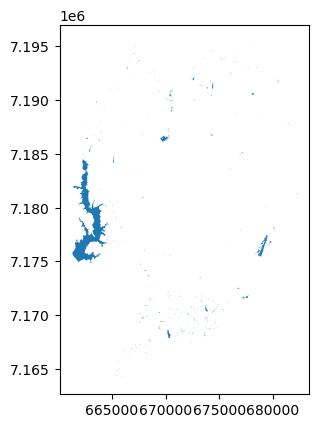

In [3]:
gdf_lagos.plot()

In [4]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')

gdf = gpd.GeoDataFrame(
    gdf_lagos)
gdf = gdf.to_crs(df_places.crs)


<AxesSubplot: >

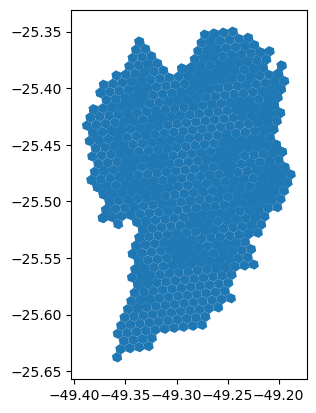

In [5]:
df_places.plot()

In [6]:
gdf = df_places.sjoin(gdf)

In [7]:
gdf_curitiba_hex = df_places
gdf_curitiba_hex.head()

,date,score,hex,NOME,geometry
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5..."
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5..."
2,2020-04-01,100,88a831acebfffff,BAIRRO NOVO,"POLYGON ((-49.26539 -25.53675, -49.26124 -25.5..."
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5..."
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5..."


In [8]:
gdf_lagos_hex = gpd.GeoDataFrame(
    gdf_lagos)
gdf_lagos_hex = gdf_lagos_hex.to_crs(df_places.crs)
gdf_lagos_hex = df_places.sjoin(gdf_lagos_hex)

<AxesSubplot: >

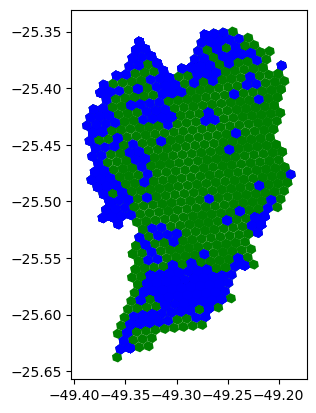

In [9]:
ax = gdf_curitiba_hex.plot(color='g')
gdf_lagos_hex.plot(ax = ax, color = 'b')

In [10]:
gdf_lagos_hex = gdf_lagos_hex.rename(columns={"date": "date_lagos", "NOME_left": "nome_lagos", "score": "score_lagos"})
gdf_lagos_hex = gdf_lagos_hex.drop(columns=["index_right", "NOME_right"])

In [11]:
gdf_lagos_hex[:5]

,date_lagos,score_lagos,hex,nome_lagos,geometry,TIPO
12,2020 -08 -14,99,88a831accdfffff,BAIRRO NOVO,"POLYGON ((-49.27198 -25.55122, -49.26783 -25.5...",LAGO E LAGOA
13,2020 -05 -09,100,88a831accdfffff,BAIRRO NOVO,"POLYGON ((-49.27198 -25.55122, -49.26783 -25.5...",LAGO E LAGOA
29,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",LAGO E LAGOA
30,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",LAGO E LAGOA
29,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",LAGO E LAGOA


In [12]:
gdf_rios = gpd.read_file('../dados/HIDRO_RIOS_LN')

gdf_rios.head()

,TIPO,NOME,geometry
0,RIO,None,"LINESTRING (678427.895 7189718.951, 678437.855..."
1,RIO,None,"LINESTRING (679736.296 7192261.492, 679744.236..."
2,RIO,None,"LINESTRING (678776.475 7191046.272, 678764.435..."
3,RIO,None,"LINESTRING (678680.496 7192859.454, 678683.526..."
4,RIO,None,"LINESTRING (679339.086 7192443.652, 679342.486..."


<AxesSubplot: >

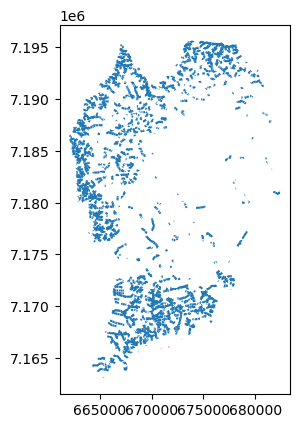

In [13]:
gdf_rios.plot()

In [14]:
gdf_rios_hex = gpd.GeoDataFrame(
    gdf_rios)
gdf_rios_hex = gdf_rios_hex.to_crs(df_places.crs)
gdf_rios_hex = df_places.sjoin(gdf_rios_hex)

In [15]:
gdf_rios_hex = gdf_rios_hex.rename(columns={"date": "date_rios", "NOME_left": "nome_rios", "score": "score_rios"})
gdf_rios_hex = gdf_rios_hex.drop(columns=["index_right", "NOME_right", "nome_rios"])

<AxesSubplot: >

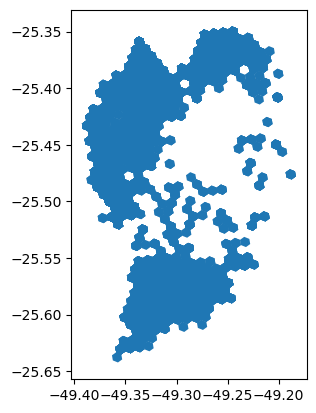

In [16]:
gdf_rios_hex.plot()

In [17]:
gdf_rios_hex.loc[gdf_rios_hex["TIPO"] == "RIO", "rio"] = 1
gdf_lagos_hex.loc[gdf_lagos_hex["TIPO"] == "LAGO E LAGOA", "lago"] = 1

In [18]:
gdf_merged = gdf_rios_hex.merge(gdf_lagos_hex, on="geometry")

In [19]:
gdf_merged["count"] = gdf_merged["rio"] + gdf_merged["lago"]
gdf_merged["score"] = gdf_merged["score_rios"] + gdf_merged["score_lagos"]

In [20]:
gdf_merged.query("score > 150")

,date_rios,score_rios,hex_x,geometry,TIPO_x,rio,date_lagos,score_lagos,hex_y,nome_lagos,TIPO_y,lago,count,score
0,2020 -07 -24,99,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",RIO,1.0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,LAGO E LAGOA,1.0,2.0,198
1,2020 -07 -24,99,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",RIO,1.0,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,LAGO E LAGOA,1.0,2.0,199
2,2020 -07 -24,99,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",RIO,1.0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,LAGO E LAGOA,1.0,2.0,198
3,2020 -07 -24,99,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",RIO,1.0,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,LAGO E LAGOA,1.0,2.0,199
4,2020 -04 -21,100,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",RIO,1.0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,LAGO E LAGOA,1.0,2.0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20291,2020 -08 -28,93,88a831a553fffff,"POLYGON ((-49.35074 -25.62793, -49.34659 -25.6...",RIO,1.0,2020 -08 -28,93,88a831a553fffff,TATUQUARA,LAGO E LAGOA,1.0,2.0,186
20292,2020 -08 -28,93,88a831a553fffff,"POLYGON ((-49.35074 -25.62793, -49.34659 -25.6...",RIO,1.0,2020 -08 -28,93,88a831a553fffff,TATUQUARA,LAGO E LAGOA,1.0,2.0,186
20293,2020 -08 -28,93,88a831a553fffff,"POLYGON ((-49.35074 -25.62793, -49.34659 -25.6...",RIO,1.0,2020 -08 -28,93,88a831a553fffff,TATUQUARA,LAGO E LAGOA,1.0,2.0,186
20294,2020 -08 -28,93,88a831a553fffff,"POLYGON ((-49.35074 -25.62793, -49.34659 -25.6...",RIO,1.0,2020 -08 -28,93,88a831a553fffff,TATUQUARA,LAGO E LAGOA,1.0,2.0,186


<AxesSubplot: >

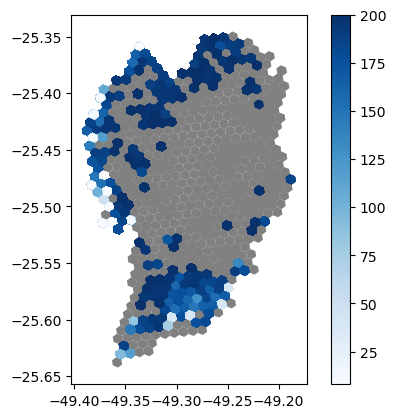

In [21]:
ax = gdf_curitiba_hex.plot(color='grey')
gdf_merged.plot(ax = ax, column="score", legend=True, cmap="Blues")

In [22]:

# add NEIGHBORS column
gdf_merged["NEIGHBORS"] = None  

for index, polygon in gdf_merged.iterrows():   

    neighbors = sum(gdf_merged[gdf_merged.geometry.touches(polygon['geometry'])].score) 

    gdf_merged.at[index, "NEIGHBORS"] = neighbors
    

/Users/cnoboa/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/plotting.py:802: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


<AxesSubplot: >

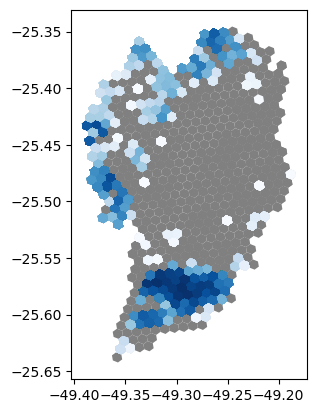

In [23]:
ax = gdf_curitiba_hex.plot(color='grey')
gdf_merged.plot(ax = ax, column="NEIGHBORS", cmap="Blues")

In [30]:
gdf_merged["hex"] = gdf_merged["hex_x"]
gdf_merged["score_hidro"] = gdf_merged["score_rios"]
gdf_merged["neighbors_hidro"] = gdf_merged["NEIGHBORS"]
gdf_merged_minor = gdf_merged[["hex", "geometry", "score_hidro", "neighbors_hidro"]]

In [31]:
gdf_merged_minor.head()

,hex,geometry,score_hidro,neighbors_hidro
0,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",99,15884
1,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",99,15884
2,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",99,15884
3,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",99,15884
4,88a831aea3fffff,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",100,15884


In [32]:
gdf_merged_minor.to_csv("../dados/lagos_rios.csv")

In [33]:
gdf_merged_minor[gdf_merged_minor["hex"] == "88a804cb05fffff"]

,hex,geometry,score_hidro,neighbors_hidro
